Import important libraries

In [17]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras import regularizers
from keras.utils import plot_model
from kt_utils import *
from cnn_utils import *
from keras.utils.vis_utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [18]:
def load_data():  
    train_dataset = h5py.File('spec_train.h5', "r")  
    #print(np.array(train_dataset))
    train_set_x_orig = np.array(train_dataset["train_image"][:]) # your train set features  
    train_set_y_orig = np.array(train_dataset["train_labels_key"][:]) # your train set labels 
    train_set_y_orig_1=train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_dataset = h5py.File('spec_test.h5', "r")  
    test_set_x_orig = np.array(test_dataset["test_image"][:]) # your test set features  
    test_set_y_orig = np.array(test_dataset["test_labels_key"][:]) # your test set labels 
    test_set_y_orig_1=test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    classes = np.array(test_dataset["classes"][:]) # the list of classes  

    return train_set_x_orig, train_set_y_orig_1, test_set_x_orig, test_set_y_orig_1, classes  


In [19]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_data()

Y_train_orig=np.int8(Y_train_orig)
Y_test_orig=np.int8(Y_test_orig)

X_train = X_train_orig/255.
X_test = X_test_orig/255.
#print(Y_train_orig.reshape(-1))
test=np.eye(7)[Y_train_orig.reshape(-1)].T
#print(test)
Y_train = convert_to_one_hot(Y_train_orig.astype(int), 7).T
Y_test = convert_to_one_hot(Y_test_orig.astype(int), 7).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 360
number of test examples = 120
X_train shape: (360, 32, 32, 3)
Y_train shape: (360, 7)
X_test shape: (120, 32, 32, 3)
Y_test shape: (120, 7)


y = 4


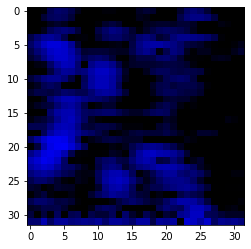

In [20]:
# Example of a picture
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [21]:
def SpeechModel(input_shape):
    
    
    model = Sequential()
    model.add(Conv2D(128, (1, 1), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
   

    model.add(Conv2D(128, (1, 1)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    

    model.add(Conv2D(64, (1, 1)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    

    model.add(Flatten())
   
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))

    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    ### END CODE HERE ###
    
    return model

In [22]:
speechModel = SpeechModel((32,32,3))

In [23]:
#plot_model(speechModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
speechModel.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [25]:
history=speechModel.fit(x = X_train,y = Y_train,validation_split=0.1,epochs =150 ,batch_size = 16)

Train on 324 samples, validate on 36 samples
Epoch 1/150
324/324 [==============================] - 1s 2ms/step - loss: 1.9442 - accuracy: 0.2099 - val_loss: 1.9279 - val_accuracy: 0.2500
Epoch 2/150
324/324 [==============================] - 0s 1ms/step - loss: 1.9301 - accuracy: 0.2469 - val_loss: 1.9132 - val_accuracy: 0.2500
Epoch 3/150
324/324 [==============================] - 1s 2ms/step - loss: 1.9237 - accuracy: 0.2469 - val_loss: 1.9214 - val_accuracy: 0.2500
Epoch 4/150
324/324 [==============================] - 1s 2ms/step - loss: 1.9150 - accuracy: 0.2500 - val_loss: 1.9084 - val_accuracy: 0.2500
Epoch 5/150
324/324 [==============================] - 1s 2ms/step - loss: 1.9026 - accuracy: 0.2623 - val_loss: 1.8930 - val_accuracy: 0.2500
Epoch 6/150
324/324 [==============================] - 1s 3ms/step - loss: 1.8905 - accuracy: 0.2593 - val_loss: 1.8819 - val_accuracy: 0.2500
Epoch 7/150
324/324 [==============================] - 1s 2ms/step - loss: 1.8500 - accuracy: 0.2

Epoch 114/150
324/324 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.7994 - val_loss: 2.2948 - val_accuracy: 0.3333
Epoch 115/150
324/324 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.8241 - val_loss: 2.2200 - val_accuracy: 0.3056
Epoch 116/150
324/324 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8395 - val_loss: 2.1495 - val_accuracy: 0.3611
Epoch 117/150
324/324 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.8364 - val_loss: 2.1693 - val_accuracy: 0.3889
Epoch 118/150
324/324 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.8426 - val_loss: 2.2936 - val_accuracy: 0.3889
Epoch 119/150
324/324 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8364 - val_loss: 2.3135 - val_accuracy: 0.3889
Epoch 120/150
324/324 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8179 - val_loss: 2.3009 - val_ac

In [16]:
predictions = speechModel.predict(X_test)
preds = speechModel.evaluate(x = X_test,y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

120/120 [==============================] - 0s 248us/step

Loss = 6.064053519566854
Test Accuracy = 0.34166666865348816


In [26]:
#confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, np.rint(predictions))
conf_matrix = tf.math.confusion_matrix(labels=Y_test.argmax(axis=1),
                                       predictions=predictions.argmax(axis=1))
print(conf_matrix)

tf.Tensor(
[[150  56  14  23   9   3]
 [  3 165   8  12  37  19]
 [ 13  56  67  54  22  16]
 [  4  34   9  88  58   0]
 [  0  22   5   4 151   0]
 [  3  95  16   2   8 108]], shape=(6, 6), dtype=int32)


In [14]:
speechModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       16512     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)      

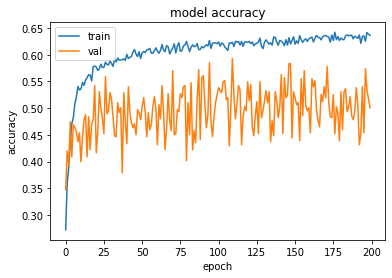

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

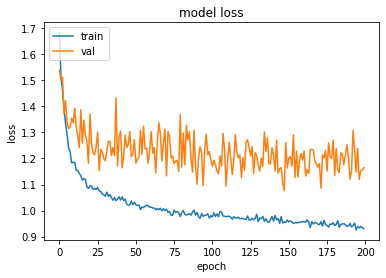

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()